In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [25]:
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import src.visualization.visualize as VizManager
import src.features.build_features as FeaturesManager
from sklearn.metrics import classification_report


RANDOM_SEED = 42

In [18]:
seasons_year = [2015, 2016, 2017, 2018]
season_type = "Regular"
features_data = FeaturesManager.build_features(seasons_year, season_type)

# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
features_data.sample(10)

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Shooter ID,Goalie,Goalie ID,...,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event,Shooter Goal Ratio Last Season,Goalie Goal Ratio Last Season,Num players With,Num players Against,Elapsed time since Power Play
47574,2015020794,197,2,Los Angeles Kings (LAK),Shot,Snap Shot,Drew Doughty,8474563,Tuukka Rask,8471695,...,1798,-47.726311,0.0,0.000000,5.919571,0.031963,0.077573,5.0,5.0,0.0
163440,2017020234,266,3,Tampa Bay Lightning (TBL),Shot,Wrist Shot,Anton Stralman,8471873,Aaron Dell,8477180,...,2495,-63.434949,0.0,0.000000,23.823425,0.038462,0.069418,5.0,5.0,0.0
247829,2018020321,57,1,Pittsburgh Penguins (PIT),Goal,Wrist Shot,Sidney Crosby,8471675,Anton Khudobin,8471418,...,604,-53.130102,1.0,69.829347,4.681880,0.117409,0.086758,5.0,5.0,0.0
125552,2016020852,330,3,Dallas Stars (DAL),Shot,Wrist Shot,Jamie Benn,8473994,Darcy Kuemper,8475311,...,3533,-10.304846,0.0,0.000000,6.012674,0.165992,0.084813,4.0,3.0,36.0
91440,2016020292,155,2,Calgary Flames (CGY),Shot,Snap Shot,Brett Kulak,8476967,Sergei Bobrovsky,8475683,...,2116,-3.270488,0.0,0.000000,0.879398,0.000000,0.092469,5.0,5.0,0.0
165836,2017020273,248,3,Edmonton Oilers (EDM),Goal,Wrist Shot,Connor McDavid,8478402,Maxime Lagace,8476509,...,2698,11.309932,1.0,30.668927,12.116472,0.119522,NaN,5.0,5.0,0.0
12889,2015020217,146,2,New York Rangers (NYR),Shot,Wrist Shot,Emerson Etem,8475770,Cam Ward,8470320,...,1692,-47.726311,0.0,0.000000,2.510918,0.064935,0.089563,5.0,5.0,0.0
67698,2015021126,265,3,Calgary Flames (CGY),Shot,Wrist Shot,TJ Brodie,8474673,Scott Darling,8474152,...,3148,-21.370622,1.0,51.439205,11.654902,0.082707,0.064439,5.0,5.0,0.0
192976,2017020710,198,3,New York Rangers (NYR),Shot,Wrist Shot,Peter Holland,8475180,Jonathan Bernier,8473541,...,2483,-33.690068,0.0,0.000000,4.607004,0.063291,0.084521,5.0,5.0,0.0
209023,2017020966,61,1,Tampa Bay Lightning (TBL),Shot,Wrist Shot,Braydon Coburn,8470601,Frederik Andersen,8475883,...,683,-12.395407,0.0,0.000000,11.990354,0.049020,0.082359,5.0,5.0,0.0


In [19]:
distance_data = features_data[['Shot distance', 'Is Goal']].dropna()
X = distance_data[['Shot distance']]
y = distance_data['Is Goal']

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
print(X_train.shape)
print(y_train.shape)

(244688, 1)
(244688,)


In [21]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(classification_report(y_valid, clf.predict(X_valid)))


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



In [22]:
accuracy = clf.score(X_valid, y_valid)
print(f'Accuracy on validation set = {np.around(100.*accuracy, 2)}%')

Accuracy on validation set = 90.62%


0.9061989145360623
Dumb Accuracy on validation set = 90.62%


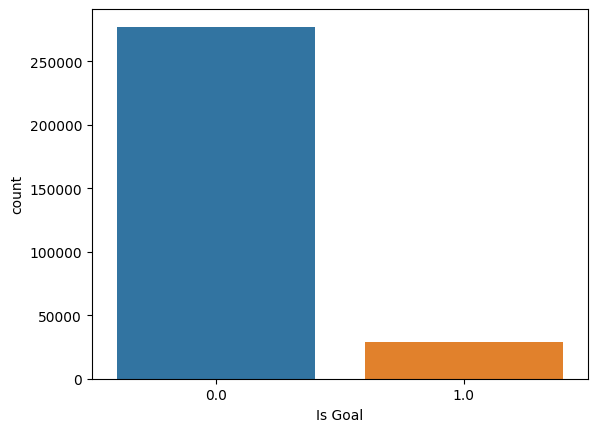

In [23]:
# Accuracy is not the right metric to use, as the classes are unbalanced
num_goals = (y_valid==1).sum()
num_no_goals = (y_valid==0).sum()
print(num_no_goals / (num_no_goals+num_goals))

# features_data['Is Goal'].value_counts().plot(kind = 'bar')
# plt.bar(x=features_data['Is Goal'], height);
sns.countplot(x = features_data['Is Goal'])

# A dumb model that predicts 0 (no goals) all the time reach the same level of performance
def dumb_model(X, y):
    pred = np.zeros_like(X)
    return (y == pred.ravel()).mean()


dumb_accuracy = dumb_model(X_valid, y_valid)
print(f'Dumb Accuracy on validation set = {np.around(100.*dumb_accuracy, 2)}%')

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



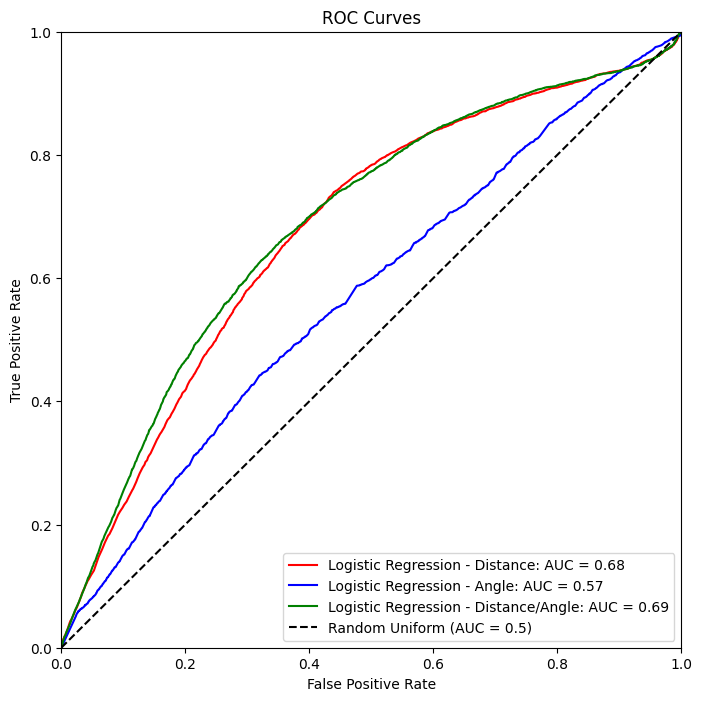

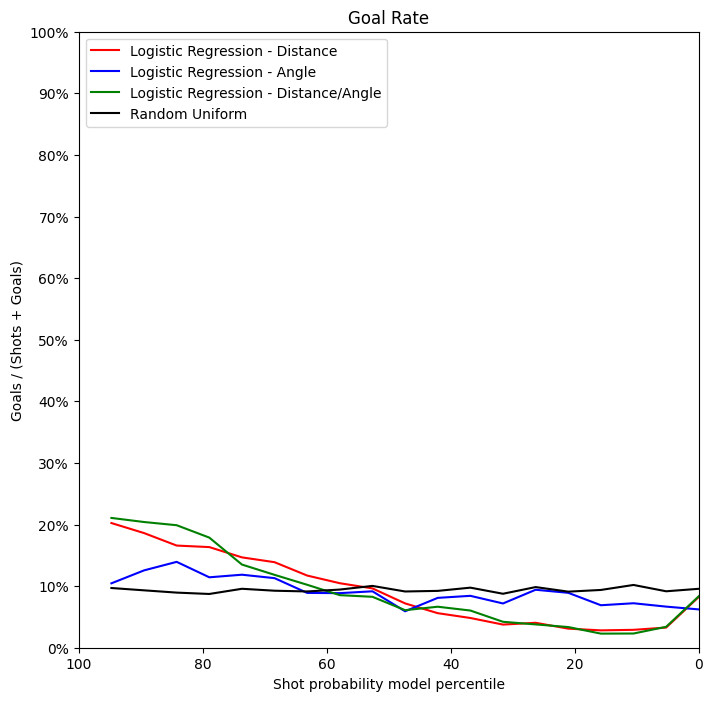

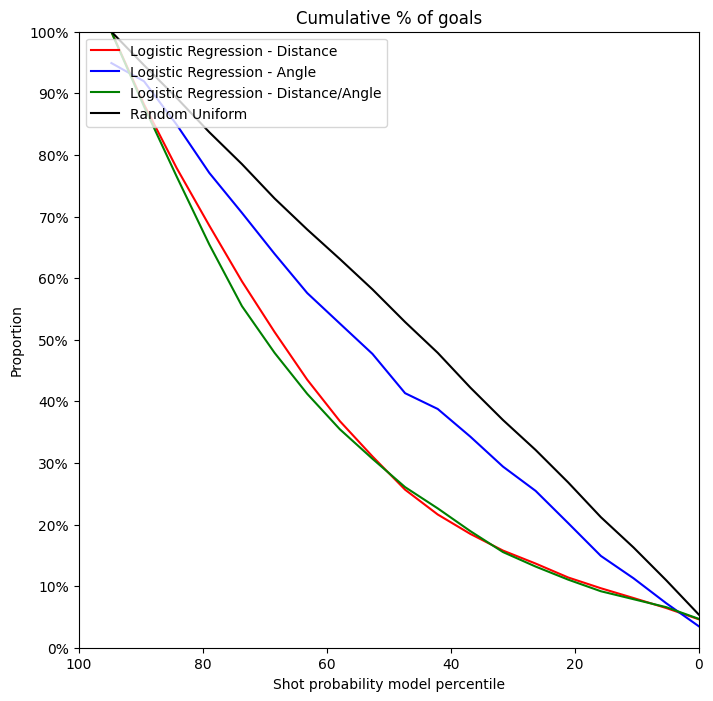

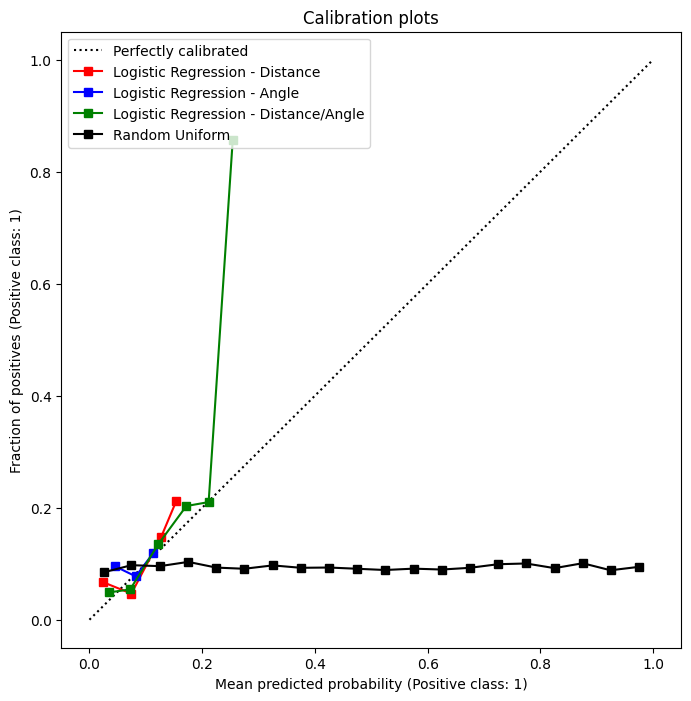

In [24]:
distance_data = features_data[['Shot distance', 'Shot angle', 'Is Goal']].dropna()
X = distance_data[['Shot distance', 'Shot angle']].to_numpy().reshape(-1, 2)
y = distance_data['Is Goal'].to_numpy()

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)


# Logistic Regression - Distance only
X_distance_train, X_distance_valid = X_train[:,0].reshape(-1, 1), X_valid[:,0].reshape(-1, 1)
clf_distance = LogisticRegression(random_state=0).fit(X_distance_train, y_train)
print(classification_report(y_valid, clf_distance.predict(X_distance_valid)))


# Logistic Regression - Angle only
X_angle_train, X_angle_valid = X_train[:,1].reshape(-1, 1), X_valid[:,1].reshape(-1, 1)
clf_angle = LogisticRegression(random_state=0).fit(X_angle_train, y_train)
print(classification_report(y_valid, clf_angle.predict(X_angle_valid)))


# Logistic Regression - Distance and Angle
X_distance_angle_train, X_distance_angle_valid = X_train, X_valid
clf_distance_angle = LogisticRegression(random_state=0).fit(X_distance_angle_train, y_train)
print(classification_report(y_valid, clf_distance_angle.predict(X_distance_angle_valid)))

classifiers = [(clf_distance, 'Logistic Regression - Distance', X_distance_valid, y_valid),
               (clf_angle, 'Logistic Regression - Angle', X_angle_valid, y_valid),
               (clf_distance_angle, 'Logistic Regression - Distance/Angle', X_distance_angle_valid, y_valid) ]


VizManager.plot_all_figures(classifiers, add_random=True)
